In [2]:

!nvidia-smi

Tue Jul 22 18:45:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:

import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 325 (delta 145), reused 142 (delta 142), pack-reused 135 (from 1)
Receiving objects: 100% (325/325), 2.23 MiB | 25.14 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:00

In [5]:
!pip install -q roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 114.8 MB/s eta 0:00:00


In [6]:


!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt


In [7]:

!ls -la {HOME}/weights

total 402452
drwxr-xr-x 2 root root      4096 Jul 22 18:48 .
drwxr-xr-x 1 root root      4096 Jul 22 18:48 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [8]:
%cd {HOME}/yolov9

/content/yolov9


In [9]:
from roboflow import Roboflow
rf = Roboflow(api_key="9XzcLYzpC8cB5P3RpOCW")
project = rf.workspace("bithal").project("anpr2-syxl7-r7mcf")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ANPR2-1 in yolov9:: 100%|██████████| 626/626 [00:00<00:00, 9934.15it/s]


In [39]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2025-07-22 19:50:25.307772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753213825.328382   18367 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753213825.334660   18367 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-22 19:50:25.355930: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Currently logged in as: bithalsahoo42 (bithalsahoo42-self-employeed) to https://api.wandb.ai. Use `wan

In [40]:

!ls {HOME}/yolov9/runs/train/exp4/

confusion_matrix.png				     R_curve.png
events.out.tfevents.1753213828.4cdbb9f0e771.18367.0  results.csv
F1_curve.png					     results.png
hyp.yaml					     train_batch0.jpg
labels_correlogram.jpg				     train_batch1.jpg
labels.jpg					     train_batch2.jpg
opt.yaml					     val_batch0_labels.jpg
P_curve.png					     val_batch0_pred.jpg
PR_curve.png					     weights


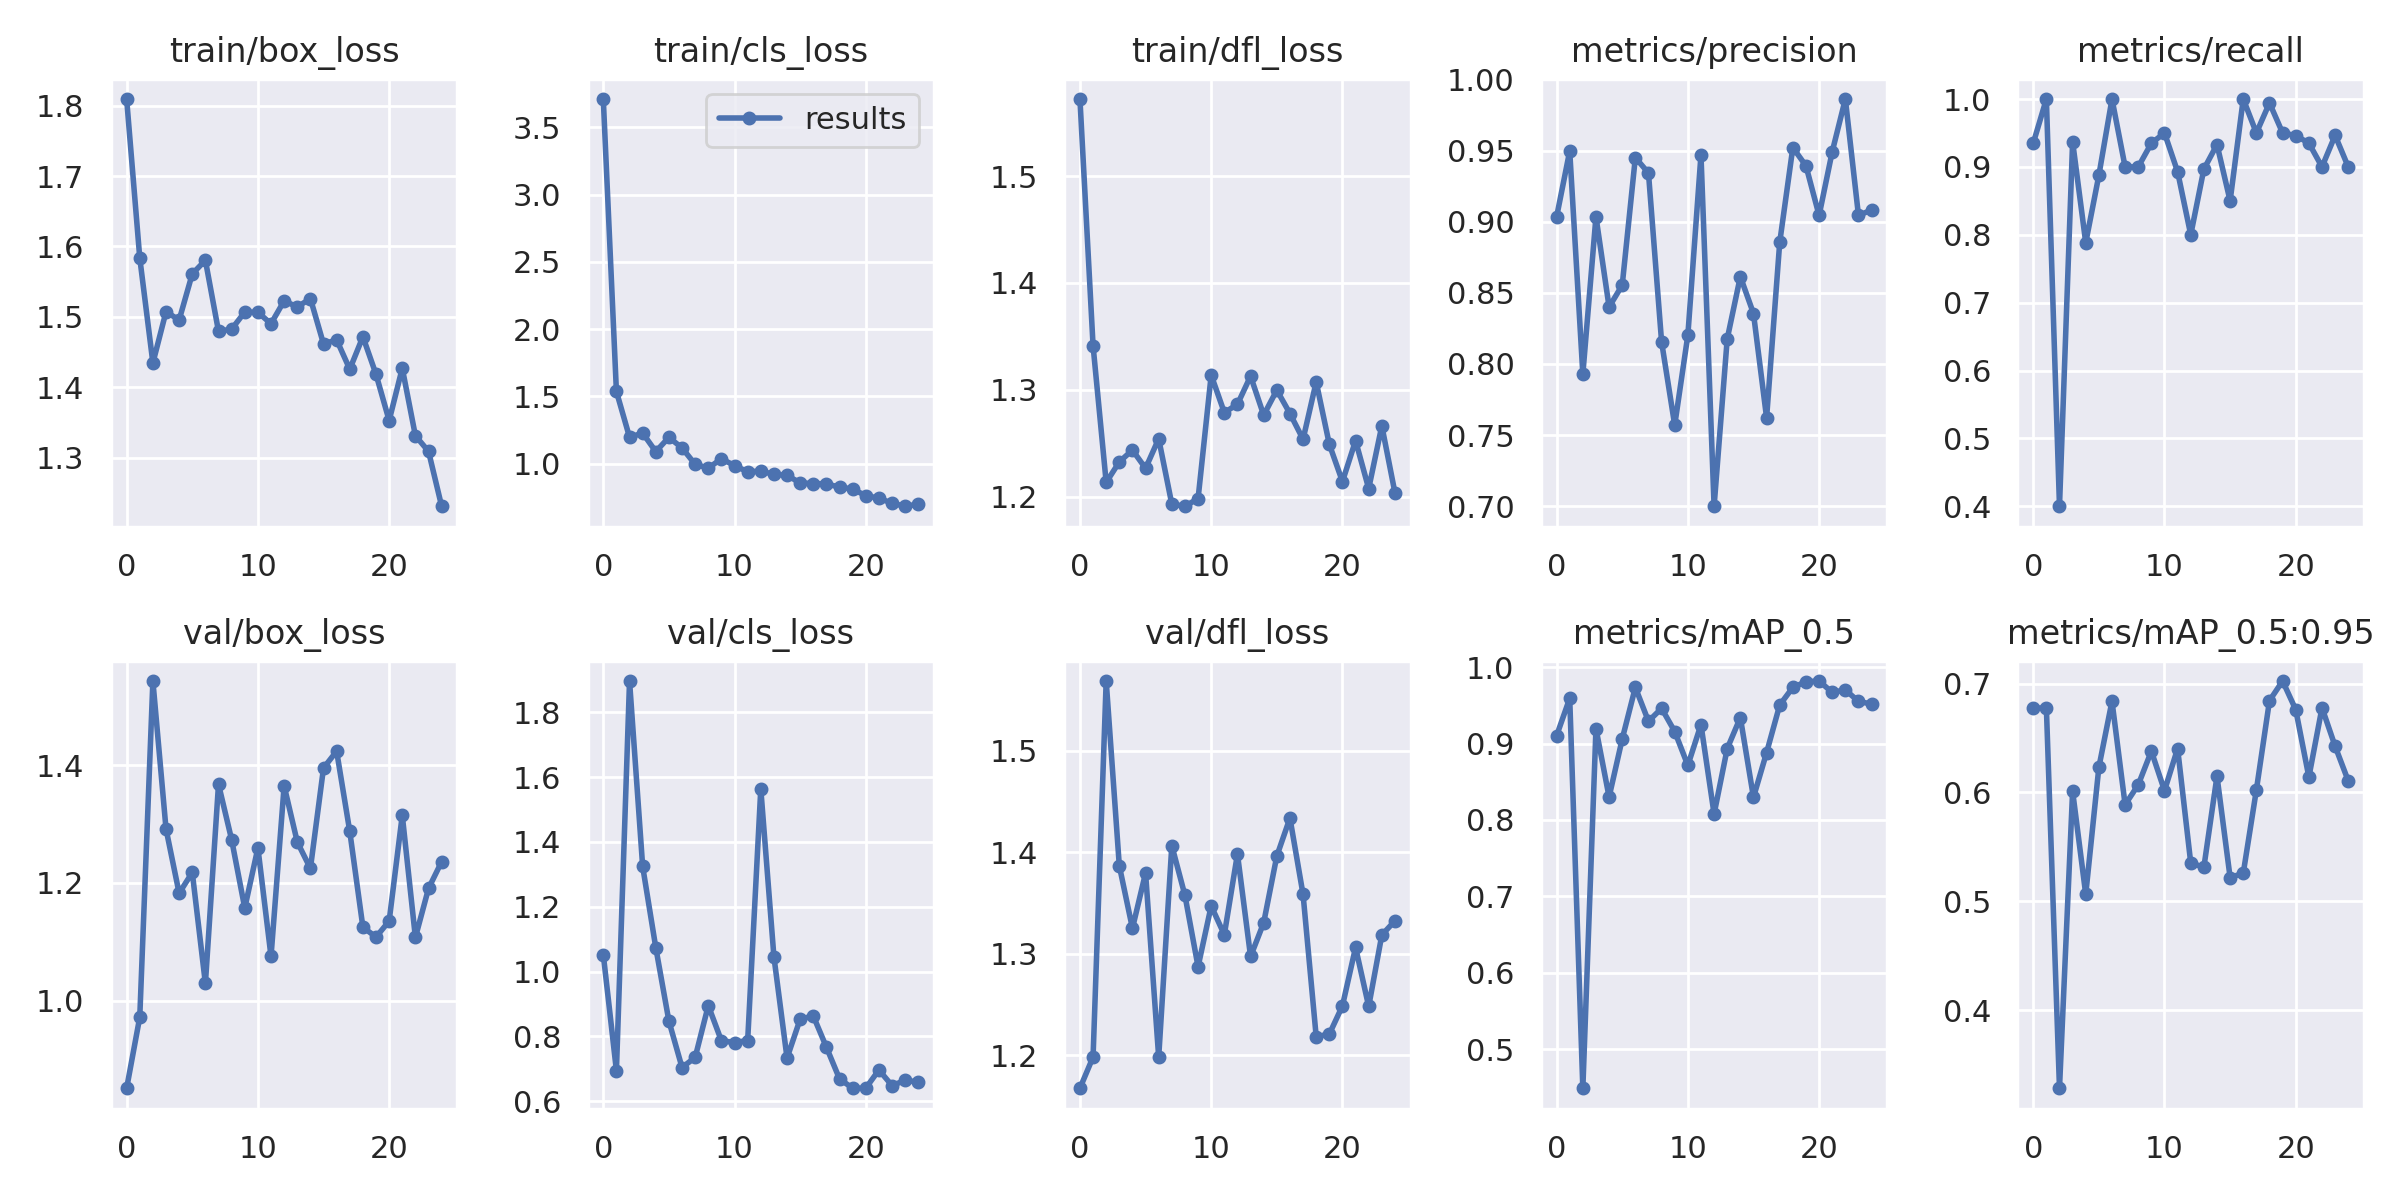

In [41]:


from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp4/results.png", width=1000)

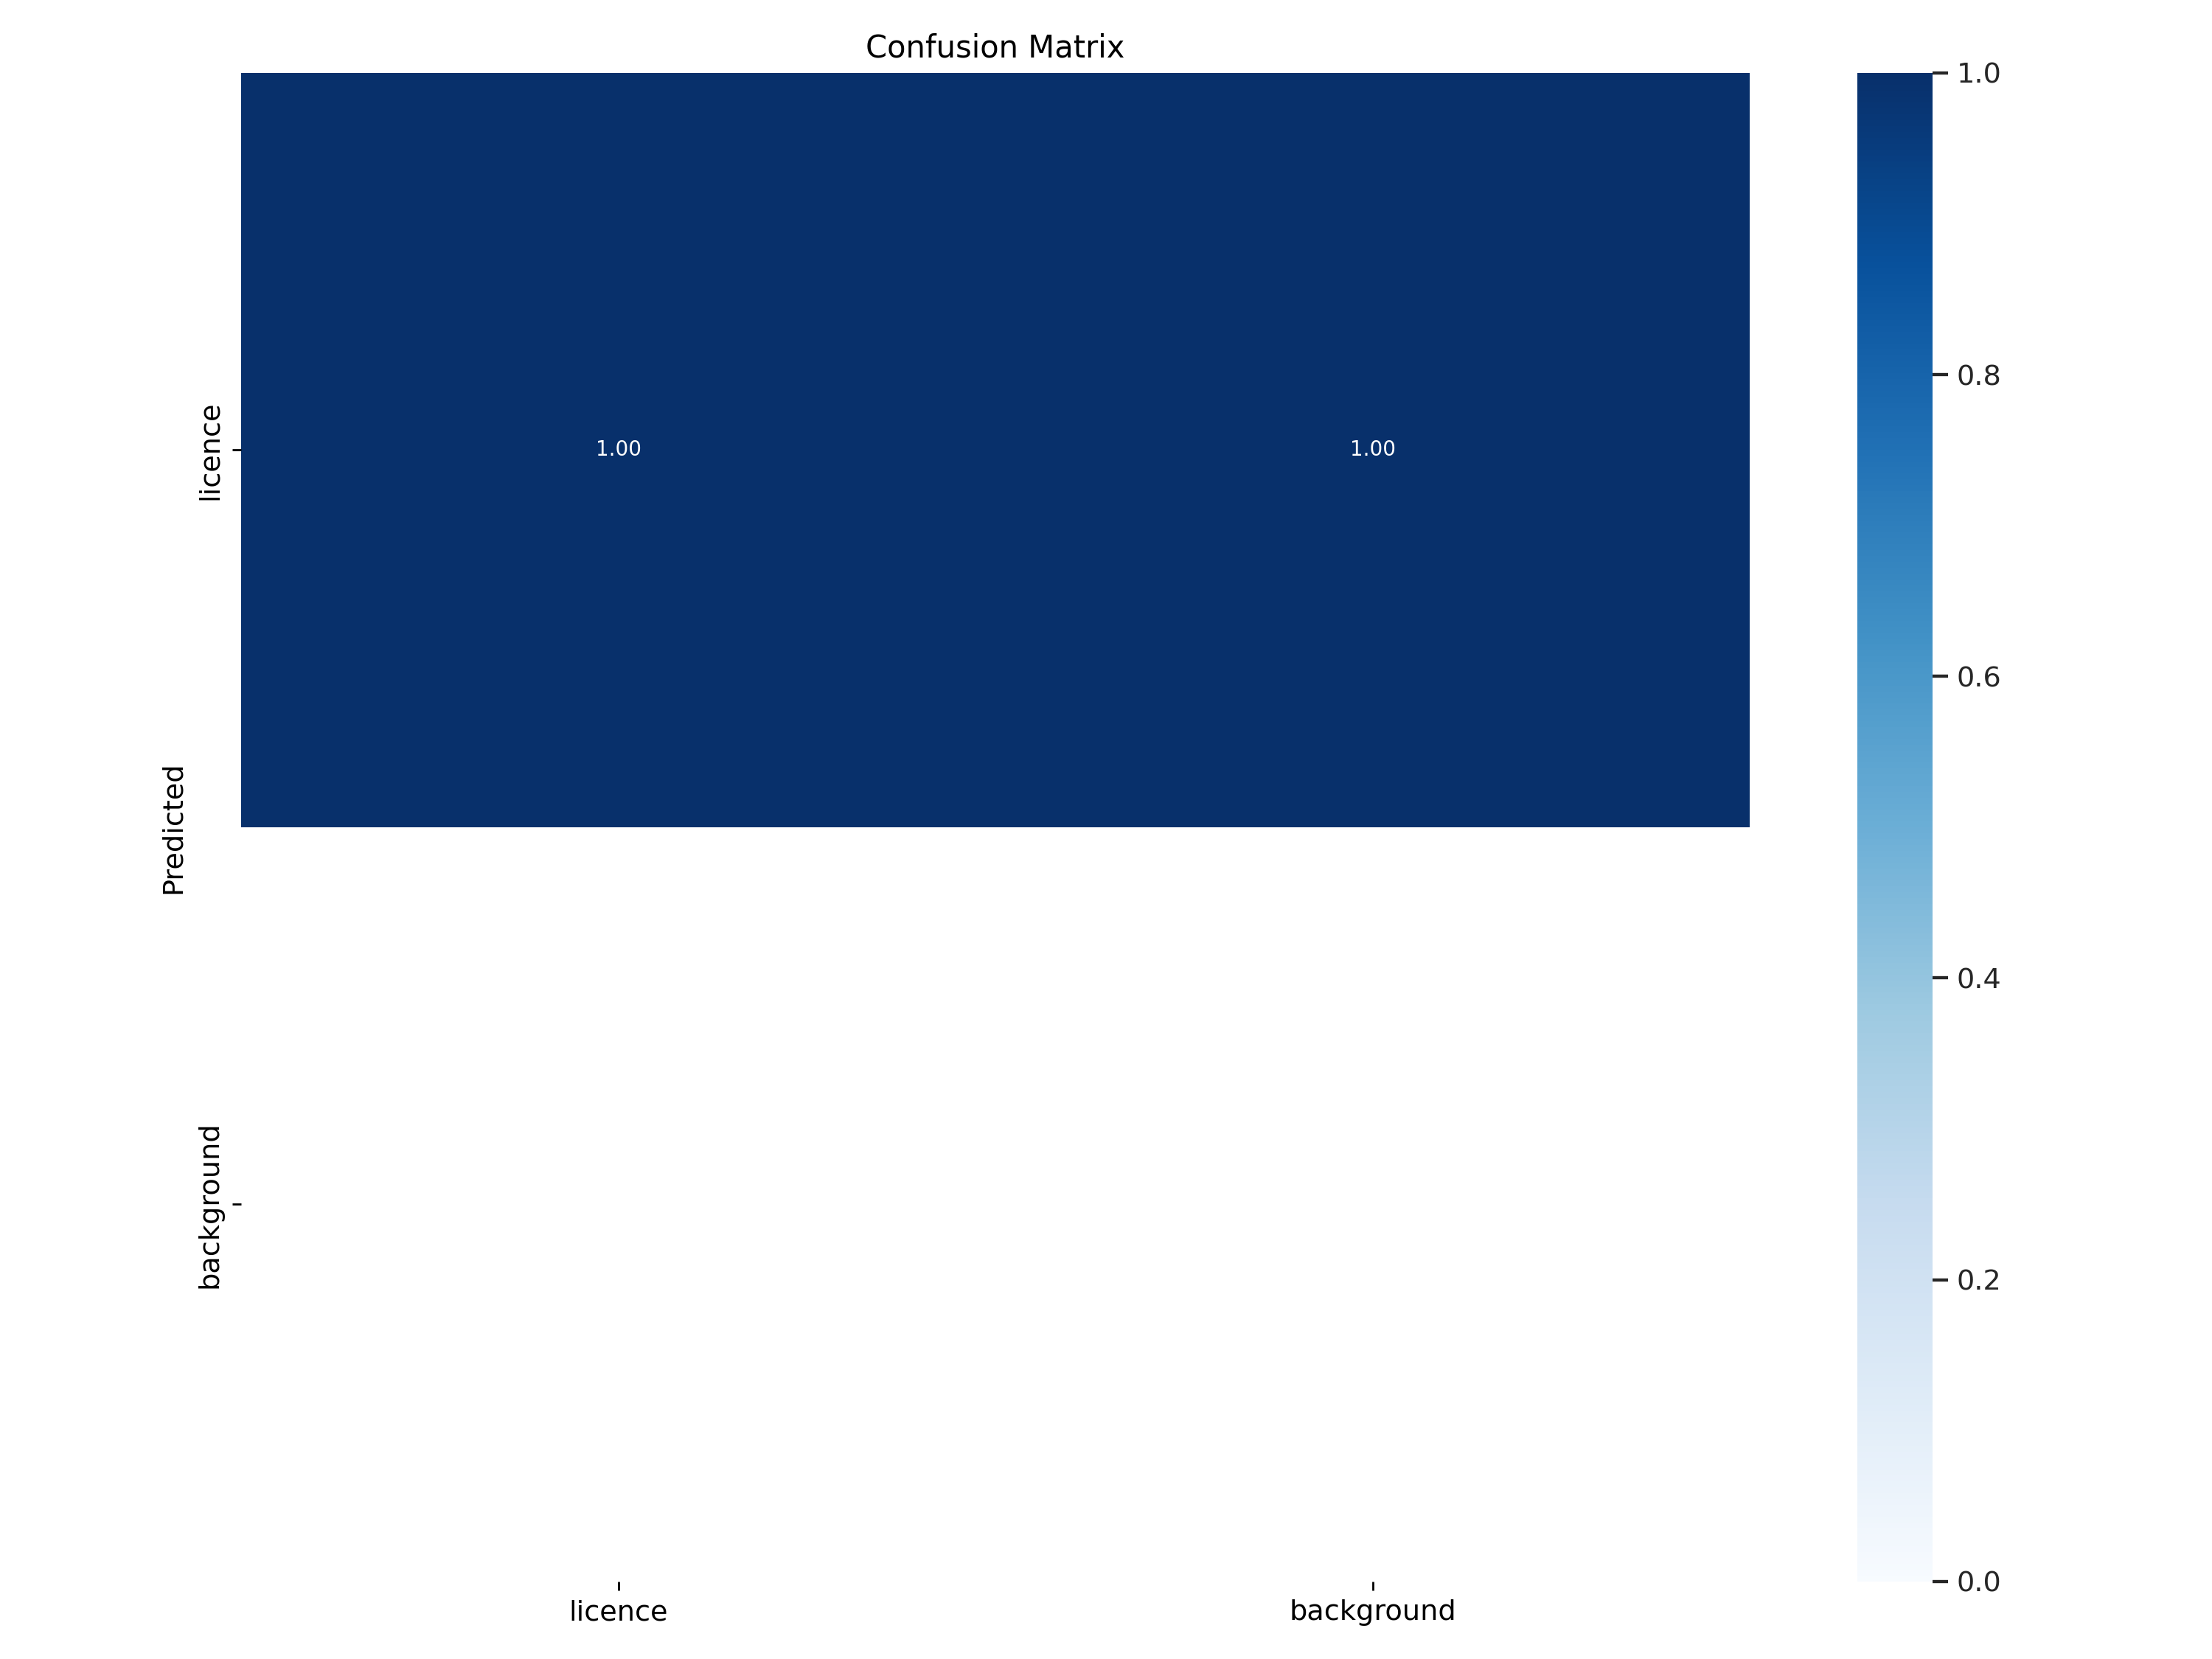

In [42]:

from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp4/confusion_matrix.png", width=1000)

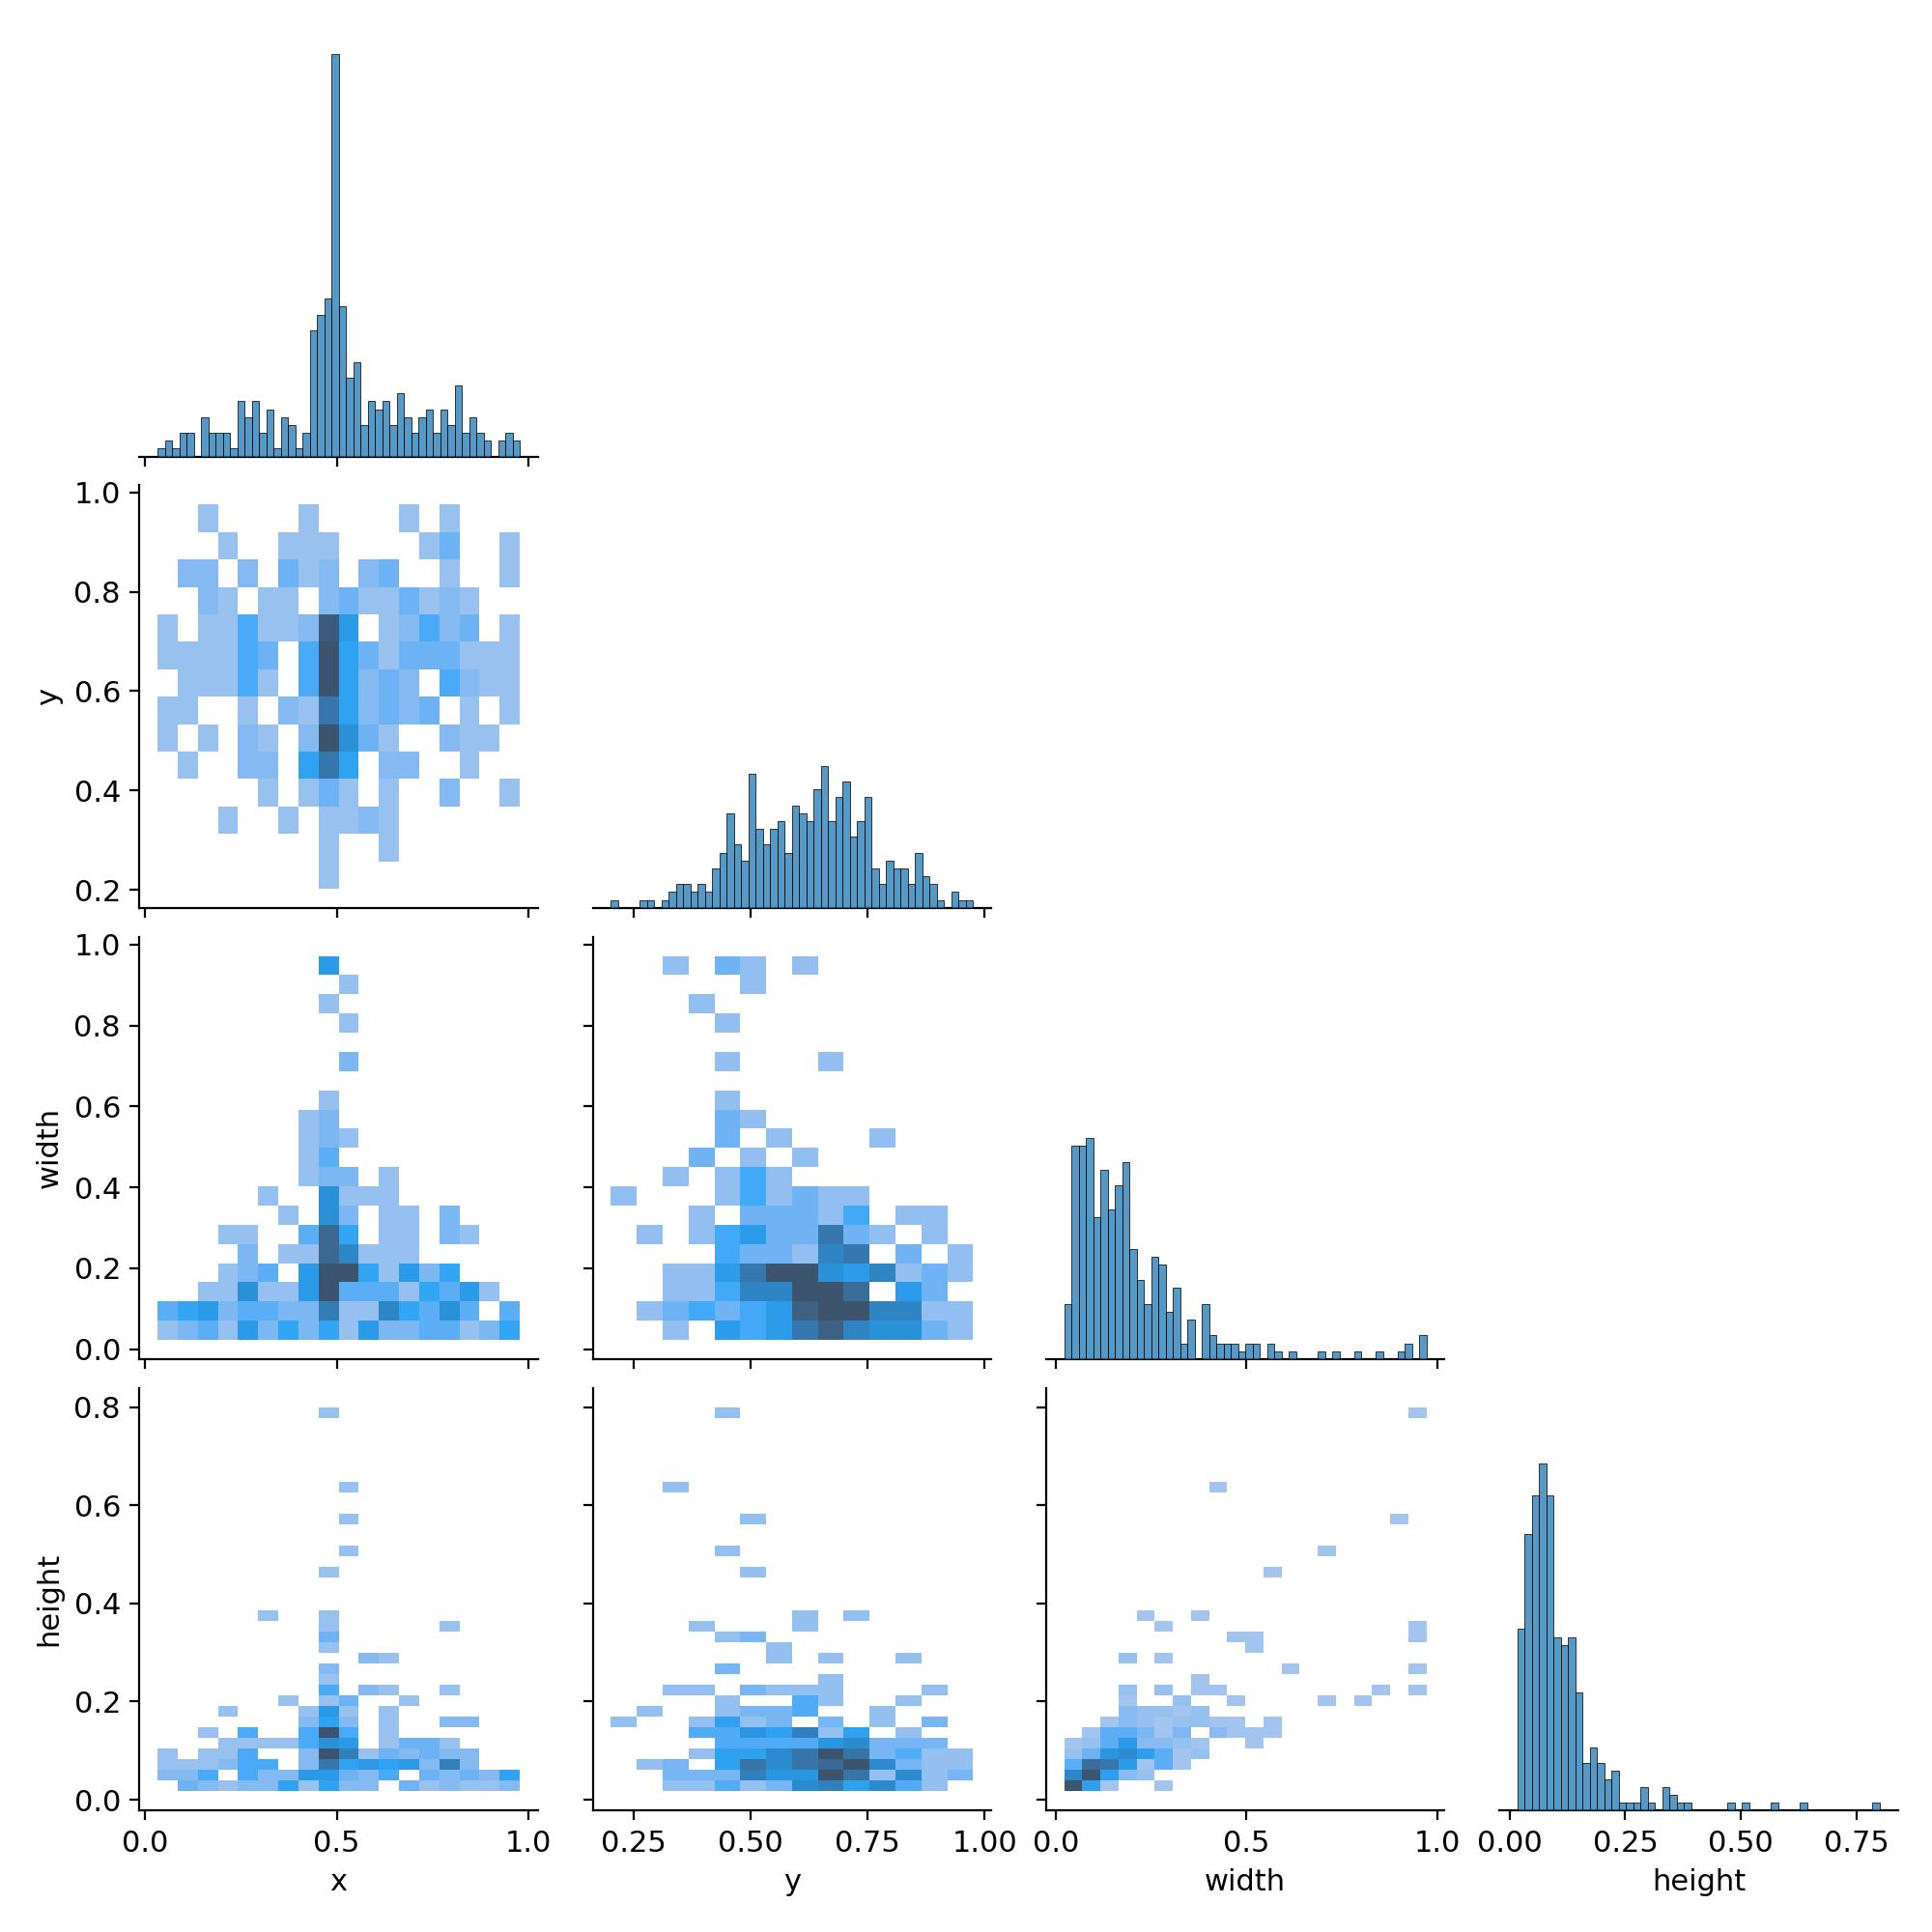

In [43]:

from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp4/labels_correlogram.jpg", width=1000)

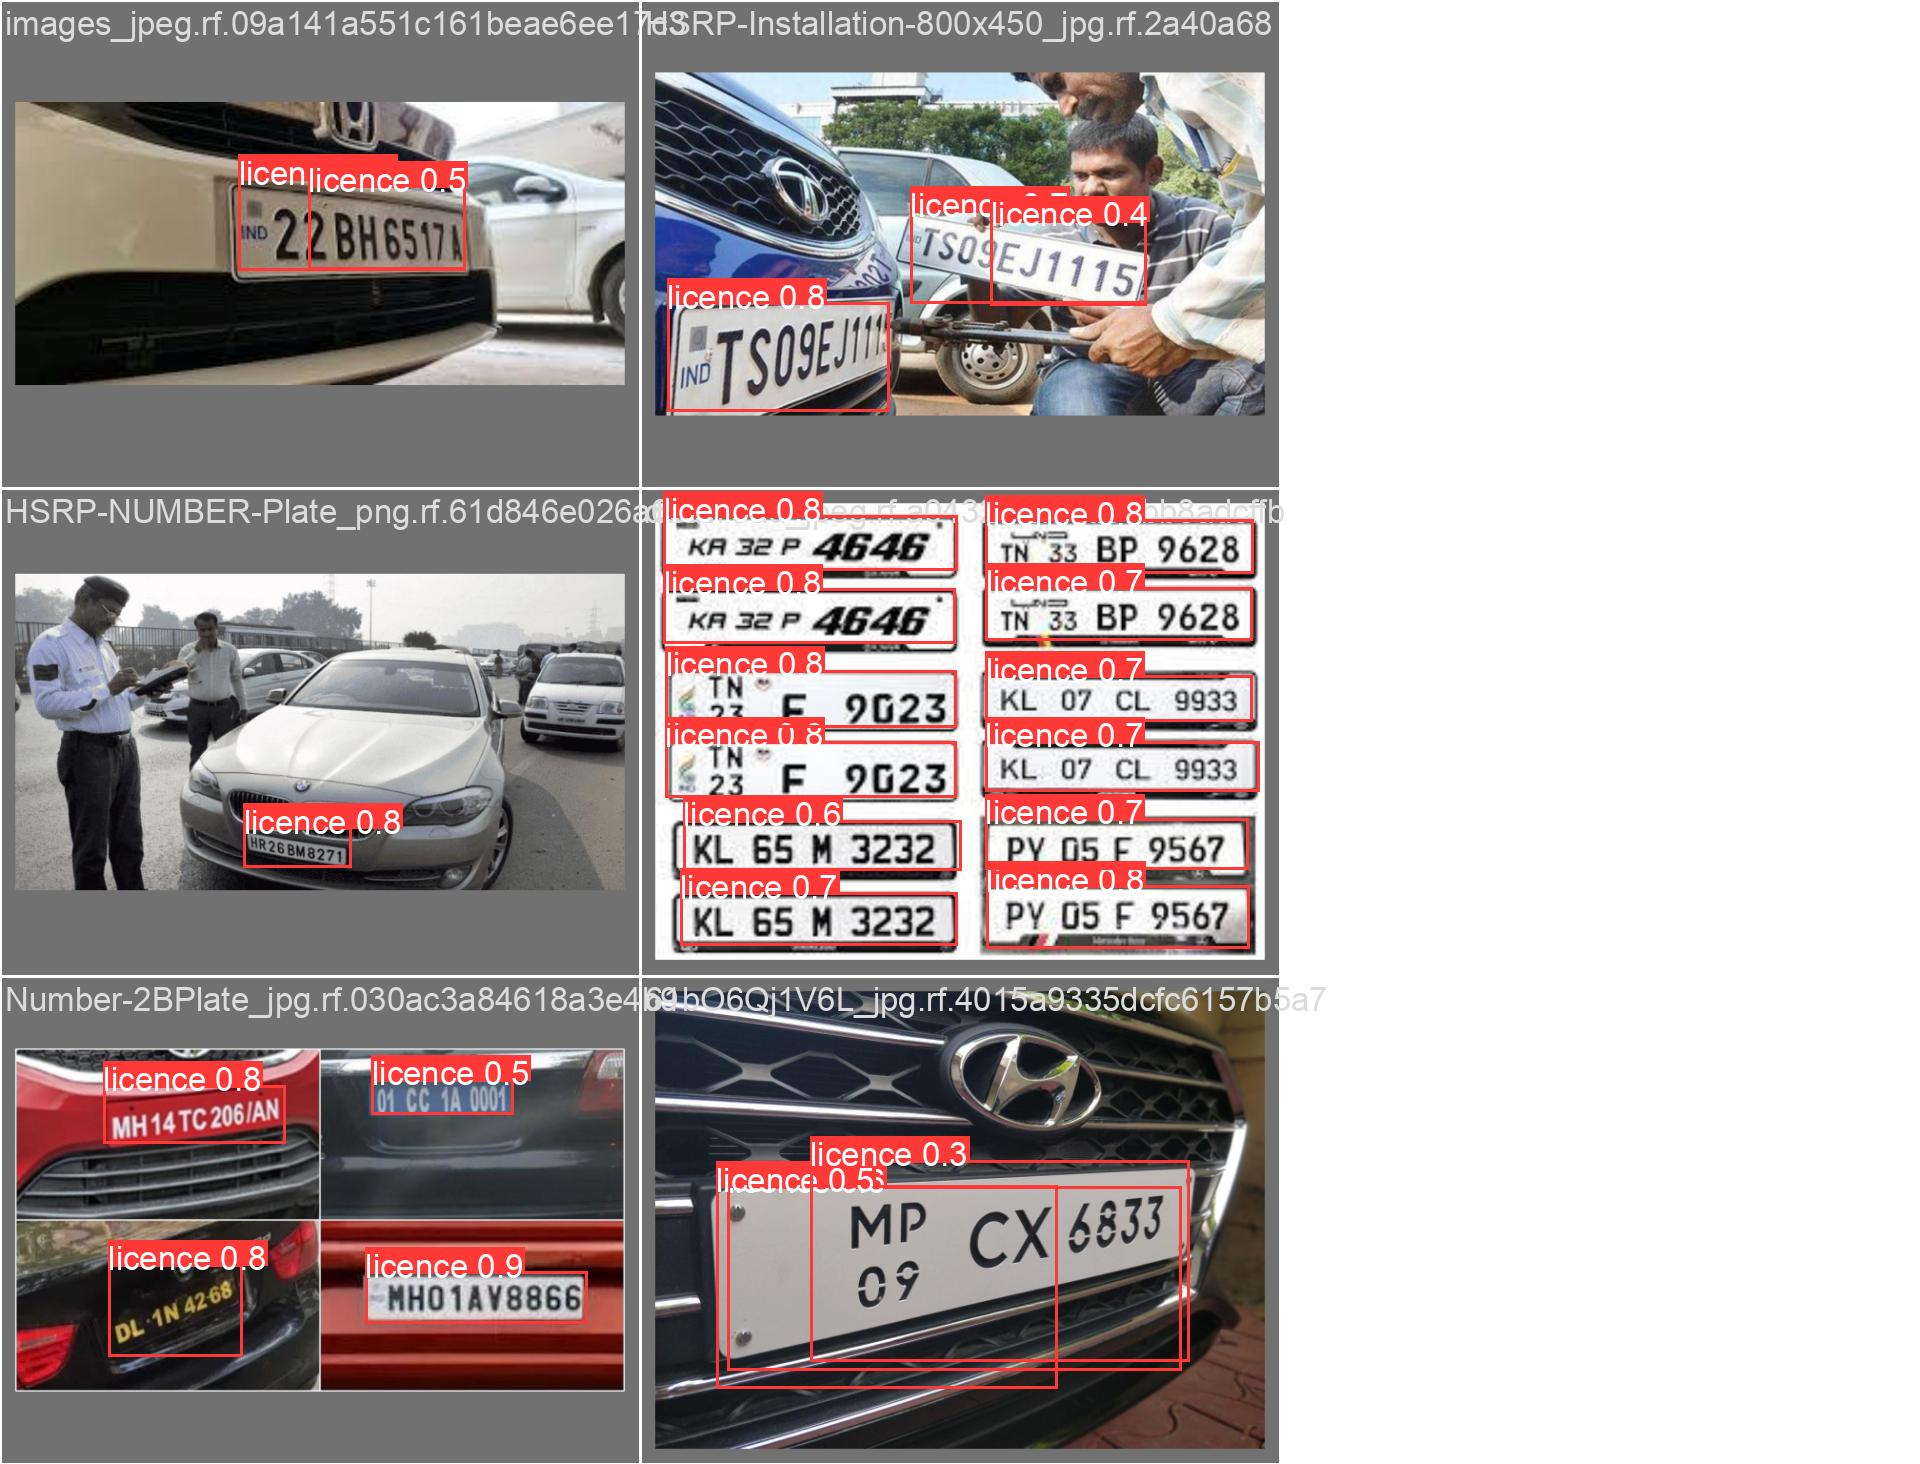

In [46]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp4/val_batch0_pred.jpg", width=1000)

In [48]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp4/weights/best.pt

/content/yolov9
val: data=/content/yolov9/ANPR2-1/data.yaml, weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/ANPR2-1/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.62it/s]
                   all          6         20       0.94       0.95      0.981      0.702
Speed: 0.2ms pre-process, 41.7ms inference, 22.1ms NMS per image at sha

In [49]:

!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp4/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], source=/content/yolov9/ANPR2-1/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
image 1/23 /content/yolov9/ANPR2-1/test/images/Cars411_png.rf.041f5af3093fe3968115a67871386fc4.jpg: 864x1280 2 licences, 89.8ms
image 2/23 /content/yolov9/ANPR2-1/test/images/Cars412_png.rf.c3e24634a7c7583795e2053e96e03a9e.jpg: 768x1280 1 licence, 62.0ms
image 3/23 /content/yolov9/ANPR2-1/test/images/Cars413_png.rf.

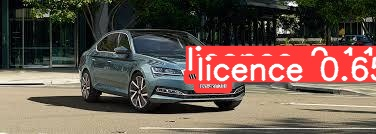

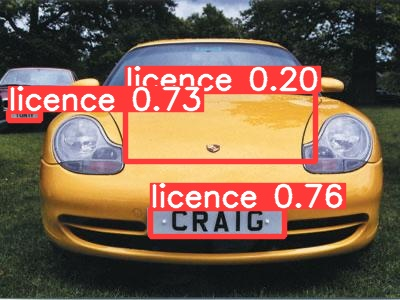

In [54]:

import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

In [56]:

# video

!python detect.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp4/weights/best.pt --source car.mp4

detect: weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], source=car.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
video 1/1 (1/1800) /content/yolov9/car.mp4: 384x640 2 licences, 59.2ms
video 1/1 (2/1800) /content/yolov9/car.mp4: 384x640 (no detections), 32.5ms
video 1/1 (3/1800) /content/yolov9/car.mp4: 384x640 3 licences, 32.5ms
video 1/1 (4/1800) /content/yolov9/car.mp4: 384x640 3 licences, 32.5ms
video 1/1 (5/1800) /content/yolov9/car.mp4: 384x640 1 lice

In [57]:

!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 28.8 MB/s eta 0:00:00


In [58]:

# video

!python anpr.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp4/weights/best.pt --source car.mp4

Progress: |██████████████████████████████████████████████████| 100.0% CompleteDownloading recognition model, please wait. This may take several minutes depending upon your network connection.
Progress: |██████████████████████████████████████████████████| 100.0% Completeanpr: weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], source=car.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
video 1/1 (1/1800) /content/yolov9/car.mp4: 384x640 2 licences, 56.4ms
video 1/

In [59]:

# video

!python detect.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp4/weights/best.pt --source multicar.mp4

detect: weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], source=multicar.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
video 1/1 (1/3000) /content/yolov9/multicar.mp4: 384x640 6 licences, 64.2ms
video 1/1 (2/3000) /content/yolov9/multicar.mp4: 384x640 6 licences, 32.7ms
video 1/1 (3/3000) /content/yolov9/multicar.mp4: 384x640 9 licences, 32.6ms
video 1/1 (4/3000) /content/yolov9/multicar.mp4: 384x640 6 licences, 32.4ms
video 1/1 (5/3000) /content/yolov9/mul

In [60]:

# video

!python anpr.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp4/weights/best.pt --source multicar.mp4

anpr: weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], source=multicar.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
video 1/1 (1/3000) /content/yolov9/multicar.mp4: 384x640 6 licences, 55.4ms
video 1/1 (2/3000) /content/yolov9/multicar.mp4: 384x640 6 licences, 32.7ms
video 1/1 (3/3000) /content/yolov9/multicar.mp4: 384x640 9 licences, 32.5ms
video 1/1 (4/3000) /content/yolov9/multicar.mp4: 384x640 6 licences, 21.9ms
video 1/1 (5/3000) /content/yolov9/multi

In [61]:

# video

!python detect.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp4/weights/best.pt --source traffic.mp4

detect: weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], source=traffic.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
video 1/1 (1/1800) /content/yolov9/traffic.mp4: 384x640 3 licences, 66.5ms
video 1/1 (2/1800) /content/yolov9/traffic.mp4: 384x640 2 licences, 32.5ms
video 1/1 (3/1800) /content/yolov9/traffic.mp4: 384x640 3 licences, 52.6ms
video 1/1 (4/1800) /content/yolov9/traffic.mp4: 384x640 2 licences, 32.5ms
video 1/1 (5/1800) /content/yolov9/traffic.

In [63]:
# video

!python anpr.py --conf 0.1 --device 0 --weights {HOME}/yolov9/runs/train/exp4/weights/best.pt --source traffic.mp4

anpr: weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], source=traffic.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
video 1/1 (1/1800) /content/yolov9/traffic.mp4: 384x640 3 licences, 57.9ms
video 1/1 (2/1800) /content/yolov9/traffic.mp4: 384x640 2 licences, 32.5ms
video 1/1 (3/1800) /content/yolov9/traffic.mp4: 384x640 3 licences, 32.5ms
video 1/1 (4/1800) /content/yolov9/traffic.mp4: 384x640 2 licences, 32.5ms
video 1/1 (5/1800) /content/yolov9/traffic.mp